In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df_rating = pd.read_csv('/content/drive/MyDrive/Books/Ratings.csv')
df_books = pd.read_csv('/content/drive/MyDrive/Books/Books.csv')
df_users = pd.read_csv('/content/drive/MyDrive/Books/Users.csv')
df_books.head()
# df_rating.head()
# df_users.head()

<ipython-input-64-398e4bc70d4a>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('/content/drive/MyDrive/Books/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [65]:
df_images = df_books.iloc[:, -2:]
df_books = df_books.iloc[:, :-2]
# df_images.head()
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [66]:
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [67]:
userCounts = df_rating['User-ID'].value_counts()
isbnCounts = df_rating['ISBN'].value_counts()
print(isbnCounts)

0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: ISBN, Length: 340556, dtype: int64


In [68]:
df_rating['User-ID'].unique()

array([276725, 276726, 276727, ..., 276709, 276721, 276723])

In [69]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
dtype: int64

In [70]:
df_rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [71]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [72]:
dfr = df_rating
dfr = dfr[~dfr['ISBN'].isin(isbnCounts[isbnCounts < 100].index)]

dfr = pd.merge(right=dfr, left = df_books, on="ISBN")
dfr.head()
dfr = dfr[~dfr['User-ID'].isin(userCounts[userCounts < 200].index)]
dfr = dfr.drop_duplicates(["Book-Title", "User-ID"])

In [73]:
combine_book_rating = dfr
columns = ['Year-Of-Publication', 'Book-Author', 'Image-URL-S', 'Publisher']
combine_book_rating =  combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0
5,0440234743,The Testament,2977,0
7,0440234743,The Testament,3363,0
10,0440234743,The Testament,7346,9
14,0440234743,The Testament,9856,0


In [74]:
df_for_nn = combine_book_rating
combine_book_rating.shape[0]

49136

In [75]:
# group by book titles and create a new column for total rating count
combine_book_rating = combine_book_rating.dropna(axis=0, subset = ['Book-Title'])
book_ratingCount = (combine_book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns={'Book-Rating': 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,1984,52
1,1st to Die: A Novel,153
2,2nd Chance,114
3,4 Blondes,72
4,A Beautiful Mind: The Life of Mathematical Gen...,46


In [76]:
combine_book_rating.shape[0]

49136

In [77]:
print(combine_book_rating.columns)
print(book_ratingCount.columns)

Index(['ISBN', 'Book-Title', 'User-ID', 'Book-Rating'], dtype='object')
Index(['Book-Title', 'totalRatingCount'], dtype='object')


In [78]:
# df = combine_book_rating;
# df = pd.DataFrame(combine_book_rating[combine_book_rating.duplicated('Book-Title', keep='first')])
# df = df.drop_duplicates()
# df.head()

df = pd.DataFrame(combine_book_rating)
combine_book_rating = df.drop_duplicates(subset=['Book-Title'])
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0
423,0452264464,Beloved (Plume Contemporary Fiction),278418,0
608,0971880107,Wild Animus,277427,0
3109,0345402871,Airframe,11676,0
3317,0345417623,Timeline,3363,0


In [79]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title')
rating_with_totalRatingCount.head()

,ISBN,Book-Title,User-ID,Book-Rating,totalRatingCount
0,0440234743,The Testament,277478,0,150
1,0452264464,Beloved (Plume Contemporary Fiction),278418,0,53
2,0971880107,Wild Animus,277427,0,365
3,0345402871,Airframe,11676,0,96
4,0345417623,Timeline,3363,0,129


In [80]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90    123.60
0.91    128.00
0.92    134.00
0.93    137.96
0.94    145.04
0.95    157.40
0.96    164.24
0.97    170.84
0.98    183.00
0.99    211.96
Name: totalRatingCount, dtype: float64


In [81]:
popularity_threshold = 211
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book = rating_popular_book.sort_values(by='totalRatingCount', ascending=False)
rating_popular_book.head()

,ISBN,Book-Title,User-ID,Book-Rating,totalRatingCount
2,0971880107,Wild Animus,277427,0,365
67,0316666343,The Lovely Bones: A Novel,277427,0,272
80,0312278586,The Nanny Diaries: A Novel,3363,0,225
30,0330332775,Bridget Jones's Diary,11676,0,221
142,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,3363,0,221


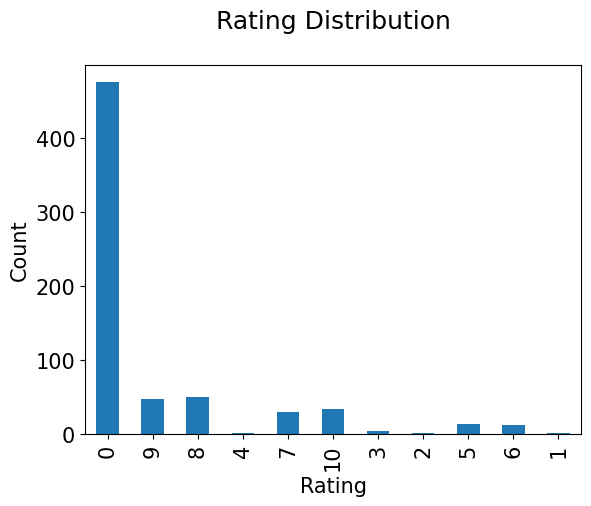

In [82]:
plt.rc('font', size=15)
combine_book_rating['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [83]:
df_for_nn.shape[0]

49136

In [109]:
# df_ready = df_for_nn.pivot_table(index=['User-ID'],columns=['ISBN'],values='Book-Rating').fillna(0).T
# df_ready.head()

In [110]:
# df_ready.index = df_ready.join(df_books.set_index('ISBN'))['Book-Title']
# df_ready

In [106]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Concatenate, Dense
from tensorflow.keras.models import Model

In [112]:
df_for_nn.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0
5,0440234743,The Testament,2977,0
7,0440234743,The Testament,3363,0
10,0440234743,The Testament,7346,9
14,0440234743,The Testament,9856,0


In [128]:
unique_books = df_for_nn['Book-Title'].unique()
book_id_mapping = {book_title: book_id for book_id, book_title in enumerate(unique_books, start=1)}

df_for_nn['Book-ID'] = df_for_nn['Book-Title'].map(book_id_mapping)

df_for_nn

,ISBN,Book-Title,User-ID,Book-Rating,Book-ID
0,0440234743,The Testament,277478,0,1
5,0440234743,The Testament,2977,0,1
7,0440234743,The Testament,3363,0,1
10,0440234743,The Testament,7346,9,1
14,0440234743,The Testament,9856,0,1
...,...,...,...,...,...
137411,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,236283,0,673
137416,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,251613,0,673
137417,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,252071,0,673
137420,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,256407,0,673


In [130]:
print(len(df_for_nn['User-ID'].unique())+1)
df_for_nn['User-ID'].max()
df_for_nn['Book-ID'].max()

889


673

In [133]:
# Define input layers
user_input = Input(shape=[1], name='user_input')
book_input = Input(shape=[1], name='book_input')

user_embedding = Embedding(input_dim=278419, output_dim=10)(user_input)
book_embedding = Embedding(input_dim=674, output_dim=10)(book_input)

user_flat = Flatten()(user_embedding)
book_flat = Flatten()(book_embedding)

prod = Dot(name="Dot-Product", axes=1)([book_flat, user_flat])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [134]:
history = model.fit([df_for_nn['User-ID'], df_for_nn['Book-ID']], df_for_nn['Book-Rating'], epochs=10, verbose=1)

Epoch 1/10
1536/1536 [==============================] - 73s 47ms/step - loss: 16.7664
Epoch 2/10
1536/1536 [==============================] - 72s 47ms/step - loss: 15.6094
Epoch 3/10
1536/1536 [==============================] - 70s 46ms/step - loss: 13.2022
Epoch 4/10
1536/1536 [==============================] - 65s 42ms/step - loss: 11.7021
Epoch 5/10
1536/1536 [==============================] - 64s 42ms/step - loss: 10.9598
Epoch 6/10
1536/1536 [==============================] - 58s 38ms/step - loss: 10.5623
Epoch 7/10
1536/1536 [==============================] - 64s 42ms/step - loss: 10.3196
Epoch 8/10
1536/1536 [==============================] - 66s 43ms/step - loss: 10.1550
Epoch 9/10
1536/1536 [==============================] - 63s 41ms/step - loss: 10.0303
Epoch 10/10
1536/1536 [==============================] - 61s 40ms/step - loss: 9.9200


In [135]:
import pickle

In [136]:
with open('/content/drive/MyDrive/Neural Network/model', 'wb') as file:
    pickle.dump(model, file)

In [155]:
with open('/content/drive/MyDrive/Neural Network/model', 'rb') as file:
    model = pickle.load(file)

In [146]:
"The Testament" in df_for_nn["Book-Title"].values

True

In [156]:
def get_recommendations(title = "", num_recommendations=5):
  try:
    matching_row = df_for_nn[df_for_nn['Book-Title'] == title]

    if not matching_row.empty:
      # Extract the book ID from the matching row
      book_id = matching_row.iloc[0]['Book-ID']
      print("Book ID for '{}' is: {}".format(title, book_id))
    else:
      print("No matching book found for the title '{}'".format(title))

    book_ids = np.array(book_id)
    print(book_ids)
    user_ids = np.array([1] * book_ids)  # Assuming user ID 1 for recommendation

    # Get predicted ratings for the input book
    predicted_ratings = model.predict([user_ids, book_ids])

    # Get indices of top recommendations
    top_indices = predicted_ratings.flatten().argsort()[-num_recommendations:][::-1]

    # Get corresponding book IDs for top recommendations
    recommended_book_ids = book_ids[top_indices]

    return recommended_book_ids.tolist()

  except IndexError:
    print(f"Book with title '{title}' not found.")
    return


In [157]:
get_recommendations("Interview with the Vampire", 5)

Book ID for 'Interview with the Vampire' is: 282
282
Book with title 'Interview with the Vampire' not found.
